# Single column radiative convective model of a dry troposphere

The atmoshpere is well mixed and convection happens instantaneously.
The only packages that are needed are numpy (for arrays) and matplotlib.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Single column radiative convective model of a dry troposphere.

The atmoshpere is well mixed and convection happens instantaneously.

Created on Tue Mar 12 22:52:52 2019

@author: tammas
"""


import numpy as np
import matplotlib.pyplot as plt

Constants and parameters are usually defined at the start of a program so they are easy to find.
In python, there is no explicit representation of parameters that can't be changed.
You are free to play arround with the physics by changing the below variables.
But sometimes this is not desirable, so be careful.

* *solarIrr* is the incoming radiation (W m<sup>-2</sup>)
* *albedo* is the ratio of radiation that is reflected at the surface. (No units)
* *sigma* is the Stefan-Boltzmann constant. It controls the rate of radiative emmision of an object. (W m<sup>−2</sup> K<sup>-4</sup>)
* *c2K* converts Celcius to Kelvin. (No units)
* *grav* Gravitational acceleration. (m s<sup>-2</sup>)
* *cp* Specific heat of dry air. This is the amount of heat required to change the temperature of a mass unit of a substance by one degree for air in a constant pressure. (J kg<sup>-1</sup> K<sup>−1</sup>)
* *gamma* Dry adiabatic lapse rate. The rate at which air cools as it rises. (K m<sup>−1</sup>)

In [2]:
# Physical constants
solarIrr    = 1360.         # Incoming solar ratiation at the top of the atmosphere
albedo      = 0.4           # Albedo of the surface of the earth
sigma       = 5.670367E-8   # Stefan-Boltzmann constant
c2K         = 273.15        # Conversion of C to K
grav        = 9.8           # Acceleration due to gravity
cp          = 1004          # Specific heat of dry air
gamma       = grav/cp       # Dry adiabatic lapse rate

Here, the initial state of the model is defined.

* We need to know the overall temperature of the atmosphere. The actual temperature of the atmosphere varies depending on height. We need this to calculate how much infrared radiation it emmits.

* We define a set of levels in the atmosphere at which we do the calculations. Here we are defining the first 10 Km of the atmosphere at 100 m intervals.

* We need another array the same size as z to contain information about the temperature. The initial state is 0 K everywhere.

* We also need an initial temperature of the surface of the earth.

In [3]:
# Initial state
tempAtmEmm = 50 + c2K        # Emissive temperature of the atmosphere
z = np.arange(100,10000,100) # Height levels
tempAtm = np.zeros(z.shape)  # Temperature of the atmosphere
tempSurf = 50 + c2K          # Temperature at the surface

The following defines two functions that implement the physical equations.
One to calculate the temperature of the surface.
And the other calculates the temperature of the atmposphere.

F<sub>LW</sub> = &sigma;T<sup>4</sup>

F<sub>SW</sub> = I*(1-&alpha;)/4

T<sub>surface</sub> = (I<sub>net</sub>/&sigma;)<sup>(1/4)</sup>

T(z) = T<sub>surface</sub> - &Gamma;z

In [8]:
# Update surface.
def update_surface():
    incLW = sigma*tempAtmEmm**4
    incSW = solarIrr*(1 - albedo)/4.
    netIncoming = incSW + incLW
    tempSurf = (netIncoming/sigma)**(1./4.)
    return tempSurf

In [5]:
# Update Atmosphere
def update_atmosphere():
    return tempSurf - gamma*z

The block of code below executes the equations defined above.
The method is implemented as a while loop.
The loop is aborted once the change in the solution for the surface temperature is below a very small value.

The procedure is:
1. save the state of the surface to an output variable
2. update the temperatures of the surface from radiation
3. ubdate the temperature of the atmosphere from surface heating
4. calculate a new emmisive temperature of the atmohsphere
5. repeat if the change in surface temperaute is larger than 1e-4 

In [6]:
delta = 1
tempSurfOut = []
while abs(delta)>1e-4:
    initial = tempSurf
    tempSurfOut.append(tempSurf - c2K)
    tempSurf = update_surface()
    tempAtm = update_atmosphere()
    tempAtmEmm = tempAtm.mean()
    delta = initial - tempSurf

The solution for the surface temperature was saved at each itteration.
The atmosphere and surface interract at each itteration until the radiative balance is (effectively) in equalibrium.

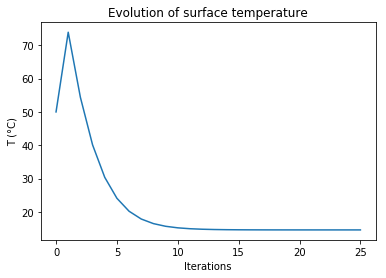

In [9]:
plt.plot(tempSurfOut)
plt.xlabel('Iterations')
plt.ylabel('T (°C)')
plt.title('Evolution of surface temperature')
plt.show()